In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Q1</h1>

(-27.425, 359.5, 359.5, -0.5)

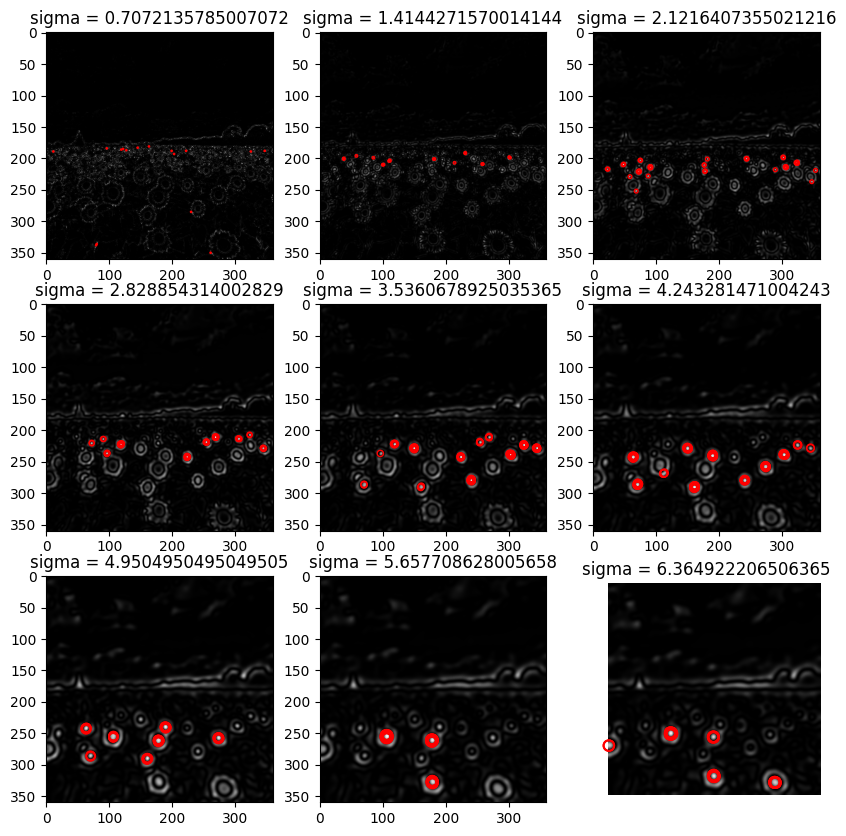

In [15]:
# Load the image
img = cv.imread('Images/the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)
img_1 = cv.cvtColor(img, cv.COLOR_BGR2GRAY) / 255

# Define the LoG filter
def LoG(sigma):
    hw = round(3 * sigma) # half width of the filter
    X, Y = np.meshgrid(np.arange(-hw, hw + 1, 1), np.arange(-hw, hw + 1, 1))
    log_filter = 1 / (2 * np.pi * sigma**2) * (X**2 / (sigma**2) + Y**2 / (sigma**2) - 2) * np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return log_filter

# Function to find local maxima in the filtered image
def maxima(img_filtered, sigma):
    coordinates = []
    (h, w) = img_filtered.shape
    k = 1
    for i in range(k, h - k):
        for j in range(k, w - k):
            img_patch = img_filtered[i - k:i + k + 1, j - k:j + k + 1]
            if np.max(img_patch) >= 0.09:
                x, y = np.unravel_index(np.argmax(img_patch), img_patch.shape)
                coordinates.append((i + x - k, j + y - k)) # coordinates of the local maxima
    return set(coordinates)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))  
for r, ax in enumerate(axes.flatten(), start=1):
    sigma = r/1.414 #1.414 = sqrt(2)
    img_filtered = np.square(cv.filter2D(img_1, -1, LoG(sigma)))
    coordinates = maxima(img_filtered, sigma)

    ax.imshow(img_filtered, cmap='gray')
    ax.set_title('sigma = ' + str(sigma))

    for x, y in coordinates:
        c = plt.Circle((y, x), r, color='red', linewidth=1, fill=False)
        ax.add_patch(c)
    ax.plot()
plt.axis('off')

<h1>Q2</h1>

<h1>Q3</h1>

In [3]:
img_1 = cv.imread('Images/Wadham.jpg', cv.IMREAD_COLOR)
img_2 = cv.imread('Images/British.jpg', cv.IMREAD_COLOR)

# Create a list to store the user selected points
points_img_1 = []

# Mouse Callback function 
def click_event(event, x, y, flags, param):
    global points_img_1

    if event == cv.EVENT_LBUTTONDOWN: # If the left mouse button is clicked, record the point
        points_img_1.append((x, y))
        cv.circle(img_1, (x, y), 5, (0, 255, 0), -1)
        cv.imshow("Image 1", img_1)

        if len(points_img_1) == 4: # If four points are selected, proceed with further processing
            compute_homography()

# Function to compute homography matrix and perform superimposition
def compute_homography():
    global points_img_1

    # Define the corresponding points in img_2 with the same aspect ratio as image1)
    points_img_2 = np.array([[0, 0], [img_2.shape[1], 0], [img_2.shape[1], img_2.shape[0]], [0, img_2.shape[0]]], dtype=np.float32)

    # Compute the homography matrix
    homography_matrix, _ = cv.findHomography(points_img_2, np.array(points_img_1, dtype=np.float32))

    # Warp img_2 to match the perspective of img_1
    warped_img_2 = cv.warpPerspective(img_2, homography_matrix, (img_1.shape[1], img_1.shape[0]))

    # Blend the warped img_2 onto img_1
    alpha = 0.4 # Blending parameter
    blended_img = cv.addWeighted(img_1, 1 - alpha, warped_img_2, alpha, 0)

    # Display the resulting image
    cv.imshow("Superimposed Image", blended_img)
    cv.imwrite("Images/Superimposed.jpg", blended_img)
    cv.waitKey(0)
    cv.destroyAllWindows()

# Show the image and set the callback function for mouse events
cv.imshow("Image 1", img_1)
cv.setMouseCallback("Image 1", click_event)

cv.waitKey(0)
cv.destroyAllWindows()


<h1>Q4</h1>